#  基于MindSpore实现梯度下降算法
本实验主要专注于梯度下降的原理，并利用闭式解方程求解梯度。同时，应用MindSpore框架求解梯度。
## 1 实验目的
1.通过实验掌握梯度下降的计算原理。

2.掌握实现求解梯度方法。
## 2 梯度下降算法原理介绍
（1）梯度下降算法在机器学习中应用十分广泛，不论是在线性回归还是Logistic回归中，它的主要目的是通过迭代找到目标函数的最小值，或者收敛到最小值。

（2）使用张量求出解析解

1. 首先需要确定成本函数，这里使用MSE作为成本函数
$$MSE = (X, h_0)=\frac{1}{m}\sum ^m_{i=1}(W^Tx^{(i)}-y^{(i)})^2$$
也可以简写成：
$$MSE =\frac{1}{m}\sum (y-WX)^2$$

2. 求解目标——得到成本函数的最小值
$$target = min ||y-WX||^2 = min (y-WX)^T(y-WX)$$

3. 将求解公式展开得到：
$$target = min (y-WX)^T(y-WX)= W^TX^TWX-y^TWX-yW^TX^T+y^Ty$$

4. 对W求偏导
$$\frac{\partial target}{\partial W}= \frac{\partial(W^TX^TWX-y^TWX-yW^TX^T+y^Ty)}{\partial W}=2X^TXW-2X^Ty+0=0$$

根据$$\frac{\partial W^TX}{\partial W}=\frac{\partial X^TW}{\partial W}=X$$
$$\frac{\partial W^TXW}{\partial W}=XW + X^TW$$
矩阵对称则有：$$XW + X^TW=2XW$$

5. 求解W
$$2X^TXW-2X^Ty=0$$
$$2X^TXW=2X^Ty$$
$$W=(X^TX)^{-1}X^Ty$$

（3）计算模型关于参数$w_j$的成本函数的梯度

实现梯度下降，需要计算模型关于参数$w_j$的成本函数的梯度。也就是说，需要计算改变$w_j$，成本函数会改变多少。这里采用偏导数计算:
$$\frac{\partial}{\partial w_j}MSE(W)=\frac{2}{m}\sum ^m_{i=1}(W^Tx^{(i)}-y^{(i)})x^{(i)}_j$$
    其中，m是样本个数。
    计算成本函数的梯度向量：
![](Figures/fig001.png)
公式代码：$$\nabla _W MSE(W)=\begin{pmatrix} \frac{\partial}{\partial W_0}MSE(W)\\ \frac{\partial}{\partial W_1 }MSE(W)\\ ...\\ \frac{\partial}{\partial W_n}MSE(W) \end{pmatrix}=\frac{2}{m}X^T(xW-y)$$
    
    梯度下降的步骤为：
$$W^{(next)}=W-\eta \nabla _W MSE(W)$$

## 3 实验环境
### 实验环境要求

在动手进行实践之前，需要注意以下几点：
* 确保实验环境正确安装，包括安装MindSpore。安装过程：首先登录[MindSpore官网安装页面](https://www.mindspore.cn/install)，根据安装指南下载安装包及查询相关文档。同时，官网环境安装也可以按下表说明找到对应环境搭建文档链接，根据环境搭建手册配置对应的实验环境。
* 推荐使用交互式的计算环境Jupyter Notebook，其交互性强，易于可视化，适合频繁修改的数据分析实验环境。
* 实验也可以在华为云一站式的AI开发平台ModelArts上完成。
* 推荐实验环境：MindSpore版本=MindSpore 2.0；Python环境=3.7


|  硬件平台 |  操作系统  | 软件环境 | 开发环境 | 环境搭建链接 |
| :-----:| :----: | :----: |:----:   |:----:   |
| CPU | Windows-x64 | MindSpore2.0 Python3.7.5 | JupyterNotebook |[MindSpore环境搭建实验手册第二章2.1节和第三章3.1节](./MindSpore环境搭建实验手册.docx)|
| GPU CUDA 10.1|Linux-x86_64| MindSpore2.0 Python3.7.5 | JupyterNotebook |[MindSpore环境搭建实验手册第二章2.2节和第三章3.1节](./MindSpore环境搭建实验手册.docx)|
| Ascend 910  | Linux-x86_64| MindSpore2.0 Python3.7.5 | JupyterNotebook |[MindSpore环境搭建实验手册第四章](./MindSpore环境搭建实验手册.docx)|

## 4 数据处理
### 4.1 数据准备
 这里给出测试数据点，如下所示：<br>
    $$x_1 =[55,71,68,87,101,87,75,78,93,73]$$<br>
    $$y_1 =[91,101,87,109,129,98,95,101,104,93]$$
 x,y都是随机给出的测试数据，在后续需要使用MindSpore的tensor进行转换。
### 4.2 数据加载

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mindspore import Tensor
# 定义数据生成函数
def data_generate():            
# 给出x的值
    x = np.array([55,71,68,87,101,87,75,78,93,73])    
# 给出y的值
    y = np.array([91,101,87,109,129,98,95,101,104,93])
# 将x转换为Tensor
    x = Tensor(x.astype(np.float32))        
# 将y转换为Tensor
    y = Tensor(y.astype(np.float32))                  
    return x,y

## 5 模型构建

### 5.1 步骤 1	导入Python库&模块并配置运行信息
使用前，导入需要的Python库。代码如下：

In [2]:
# 导入numpy包用于随机生成数据
import numpy as np
# 导入绘图库
import matplotlib.pyplot as plt
# 从MindSpore中导入Tensor库
from mindspore import Tensor

### 5.2 定义梯度下降求解函数的参数变量
#### 采用张量实现梯度下降方法
根据梯度下降的公式，更新梯度，给定参数：迭代次数(500-15000)，学习率0.00001,在后续绘制函数图像进行可视化及执行绘图函数进行测试时应用给定的两个参数，并验证梯度下降方法的使用效果。

根据提示，补充完整代码：

In [3]:
#定义梯度下降求解函数
# lr: 学习率
# num_iter: 迭代次数
def ols_gradient_descent(x,y,lr,num_iter):
    return w1,w0
    pass

In [4]:
# 参考答案：
#定义梯度下降求解函数
# lr: 学习率
# num_iter: 迭代次数
def ols_gradient_descent(x,y,lr,num_iter):
    w1 = 0
    w0 = 0
    for i in range(num_iter):
        y_hat = (w1 * x)+ w0
        w1_gradient = -2 * sum(x*(y-y_hat))
        w0_gradient = -2 * sum(y-y_hat)
        w1 -=lr * w1_gradient
        w0 -= lr* w0_gradient
    return w1,w0

### 5.3 数据读取与处理
使用numpy生成数据，之后使用mindspore的Tensor进行数据转换，代码如下：

In [5]:
# 定义数据生成函数
def data_generate():            
# 给出x的值
    x = np.array([55,71,68,87,101,87,75,78,93,73])    
# 给出y的值
    y = np.array([91,101,87,109,129,98,95,101,104,93])
# 使用MindSpore中的Tensor库将x和y数组转换成Tensor
    x = Tensor(x.astype(np.float32))        
    y = Tensor(y.astype(np.float32))      
#返回x,y数组
    return x,y

### 5.4 采用张量求出解析解并构建解析解模型
线性回归的解可以用公式简单表达出来，这类解叫做解析解（analytical solution）。

根据提示，补充完整代码：

In [93]:
#定义解析解函数：
def ols_algebra(x, y):
    #根据解析计算方法求解w，补充代码  
    return w1,w0 
    pass

In [6]:
#参考答案
#定义解析解函数：
def ols_algebra(x, y):
    #根据解析计算方法求解w
    n = len(x)
    w1 = (n * sum(x * y) - sum(x) * sum(y)) / (n * sum(x * x) - sum(x) * sum(x))
    w0 = (sum(x * x) * sum(y) - sum(x) * sum(x * y)) / (n * sum(x * x) - sum(x) * sum(x))
    return w1,w0

In [7]:
#通过填充后的代码查看结果
x,y = data_generate()
w1,w0 = ols_algebra(x,y)
print(w0)
print(w1)

44.256042
0.7175629


### 5.5  构建绘图函数进行可视化
迭代完成之后，定义绘图函数，利用绘图进行比较。采用subplots绘制子图1*2个15*5大小的子图； 绘制y与x的散点图，并使用不同的标记大小或颜色。

代码如下：

In [8]:
# 定义画图函数：
def plot_pic(w1,w0,w1_,w0_,x,y):
# 采用subplots绘制子图1*2个15x5大小的子图
    fig, axes = plt.subplots(1,2, figsize=(15,5))  
# 返回具有从该数组复制的值的 numpy.ndarray 对象
    w1 = w1.asnumpy()                              
    w0 = w0.asnumpy()
    w1_ = w1_.asnumpy()
    w0_ = w0_.asnumpy()
    x = x.asnumpy()
    y = y.asnumpy()
# 绘制y与x的散点图，并使用不同的标记大小或颜色
    axes[0].scatter(x,y)
#根据给出的x和y画出红线
    axes[0].plot(np.array([50,110]), np.array([50,110]) * w1 + w0, 'r') 
    axes[0].set_title("OLS")
    axes[1].scatter(x,y)
    axes[1].plot(np.array([50,110]), np.array([50,110]) * w1_ + w0_, 'r')
    axes[1].set_title("Gradient descent")
    plt.show()

## 6   模型测试
调用梯度下降方法执行结果：
通过调用之前定义好的data_generate函数生成数据，调用ols_algebra函数计算解析解，调用ols_gradient_descent函数使用梯度下降方法求解w。然后，根据构建的绘图函数模型，执行绘图代码进行测试，给出绘图结果。

代码如下：

0.7175629
44.256042
1.2633123
0.12807482


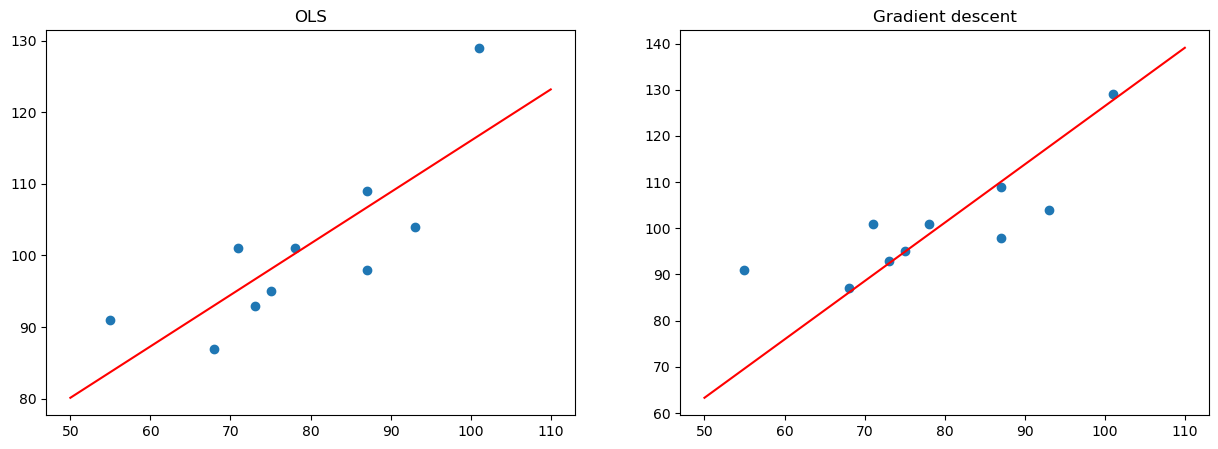

1.260542
0.35208568


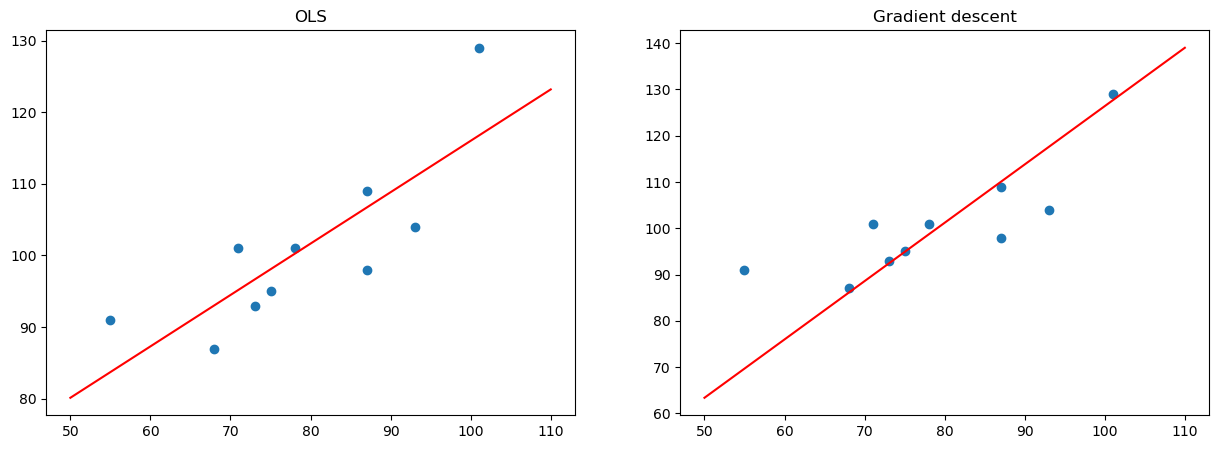

In [9]:
# 调用data_generate函数生成数据
x,y = data_generate()         
 # 调用ols_algebra函数计算解析解
w1,w0 = ols_algebra(x,y)      
print(w1)
print(w0)
# 调用ols_gradient_descent函数使用梯度下降方法求解w
w1_,w0_ = ols_gradient_descent(x,y,lr = 0.00001, num_iter = 500) 
print(w1_)
print(w0_)

plot_pic(w1,w0,w1_,w0_,x,y)
# 增加迭代次数后查看求解w
w1_,w0_ = ols_gradient_descent(x,y,lr = 0.00001, num_iter = 1500) 
print(w1_)
print(w0_)

plot_pic(w1,w0,w1_,w0_,x,y)

## 7 实验总结
本实验基于MindSpore的张量实现梯度下降闭式解，展示了如何通过张量构建闭式解的流程。实验主要对梯度下降进行实现，在学习了直接求解过程后，利用MindSpore提供的张量Tensor完成梯度下降方法的实现并使用提供数据进行验证绘图。